In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with TEASER-S model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.teaser_s import TEASER_S

## Datasets

In [3]:
## Uncomment corresponding directory.
DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
# DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = TEASER_S

# L2_1 = [10 ** p for p in range(2, 8)]
# L2_2 = [10 ** p for p in range(2, 9)]

L2_1 = [50, 100, 200, 500]
L2_2 = [50000000, 100000000, 200000000]
# RHO = 0
RHO = [100]
DELTA = 0
MAX_ITER = 10
HYPERPARAMS = {'l2_1': L2_1, 'l2_2': L2_2, 'rho': RHO, 'delta': DELTA,'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2_1': [50, 100, 200, 500],
 'l2_2': [50000000, 100000000, 200000000],
 'rho': [100],
 'delta': 0,
 'max_iterations': 10}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
# Precomput XTX and decomposition of XTX, since it's needed for all hyperparameters combinations and doesn't change
XTX = (X.T @ X).toarray()
p, U = np.linalg.eigh(XTX)
fit_params = {'XTX': XTX, 'p': p, 'U': U}

In [9]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, S, Xval_in, Xval_out, HYPERPARAMS, fit_params=fit_params)

Training model TEASER_S with hyperparameters {'l2_1': 50, 'l2_2': 50000000, 'rho': 100, 'delta': 0, 'max_iterations': 10}
Decompose DTD


norm E 0.9289810146120623
diag norm: 0.3545243086651836
diag_diff: 64.30330528456649

norm E 13.379208310016447
diag norm: 4.683106429568069
diag_diff: 967.1537259784142
rho * change E: 1250.8217675408036

norm E 210.3269377840535
diag norm: 69.54236922155204
diag_diff: 17020.782404237303
rho * change E: 19753.806091323953

norm E 3674.718384007026
diag norm: 1184.3848200186999
diag_diff: 309219.08050026826
rho * change E: 346795.2446567462

norm E 66620.47530947297
diag norm: 21300.597966920846
diag_diff: 5663764.862380857
rho * change E: 6296124.343847936

norm E 1219074.223684842
diag norm: 388782.2822814573
diag_diff: 103916381.51246999
rho * change E: 115251631.92507254

norm E 22357014.09883311
diag norm: 7123742.729946468
diag_diff: 1907161133.5484188
rho * change E: 2113817083.8931718

norm E 410231782.22127825
diag norm: 130671982.35055754
diag_diff: 35002680335.04023
rho * change E: 38787554891.84967

norm E 7528452581.325151
diag norm: 2397758128.305036
diag_diff: 6424085527

norm E 4.5281200292205845
diag norm: 5.491591927291166
diag_diff: 78.11009804130218

norm E 874.0437943246849
diag norm: 1063.5176480043144
diag_diff: 13805.760455497883
rho * change E: 86953.14639480824

norm E 164798.75112416164
diag norm: 200528.73792298575
diag_diff: 2600630.5426725596
rho * change E: 16392471.165550722

norm E 31045601.812545903
diag norm: 37776630.77777775
diag_diff: 489903624.66803896
rho * change E: 3088080306.308766

norm E 5848359843.418485
diag norm: 7116349096.149357
diag_diff: 92287749336.72705
rho * change E: 581731424160.6567

norm E 1101710728678.9697
diag norm: 1340573831610.7598
diag_diff: 17385113104852.72
rho * change E: 109586236883555.25

norm E 207539634939336.34
diag norm: 252536529239469.56
diag_diff: 3274997622738599.5
rho * change E: 2.0643792421065736e+16

norm E 3.909619725992531e+16
diag norm: 4.757268637100652e+16
diag_diff: 6.169421715825892e+17
rho * change E: 3.8888657624985964e+18

norm E 7.364919189906812e+18
diag norm: 8.96171534126

norm E 0.24400479761266966
diag norm: 0.11849863353401179
diag_diff: 17.40617927298275

norm E 0.6520464320712978
diag norm: 0.24986350483564923
diag_diff: 24.215662387934955
rho * change E: 45.57923848359384

norm E 1.6415800744333753
diag norm: 0.5479200785107001
diag_diff: 51.63802634907938
rho * change E: 101.17710676620287

norm E 3.6865780149728895
diag norm: 1.1917619830832809
diag_diff: 109.09484765546549
rho * change E: 205.32691853469356

norm E 7.724411198099689
diag norm: 2.4742499664250257
diag_diff: 221.37121132783466
rho * change E: 404.08575198753385

norm E 15.569829152128706
diag norm: 4.966915703293086
diag_diff: 436.79776256853074
rho * change E: 784.6631396236245

norm E 30.589236628242254
diag norm: 9.743459262278806
diag_diff: 846.2878741252791
rho * change E: 1501.9954912615542

norm E 59.13936355369802
diag norm: 18.819650753115745
diag_diff: 1620.006475334187
rho * change E: 2855.03916504104

norm E 113.06308199654386
diag norm: 35.96489596424419
diag_diff: 30

norm E 0.27510729007227624
diag norm: 0.1886298659160609
diag_diff: 8.763735062966946

norm E 0.40824609134573486
diag norm: 0.32417789786901285
diag_diff: 8.290286808415994
rho * change E: 20.22246641318464

norm E 0.4929699631331188
diag norm: 0.4139040769537412
diag_diff: 7.720359800773871
rho * change E: 14.910110488198855

norm E 0.533382557157229
diag norm: 0.4596229624081557
diag_diff: 6.633533383749802
rho * change E: 13.534506416571471

norm E 0.5129213219466449
diag norm: 0.4433061685698906
diag_diff: 5.606549805767823
rho * change E: 14.469585992713446

norm E 0.4652711379003817
diag norm: 0.395022187885617
diag_diff: 4.1570250549580425
rho * change E: 14.752506291949356

norm E 0.3830819720942128
diag norm: 0.30227821945449923
diag_diff: 3.360038435535464
rho * change E: 19.651262597546715

norm E 0.3068340452978447
diag norm: 0.2166471125648625
diag_diff: 2.4283241688805983
rho * change E: 17.127436463717572

norm E 0.2780214240400048
diag norm: 0.1708865235219149
diag_dif

norm E 0.15312285211900314
diag norm: 0.10947941671494345
diag_diff: 31.24956901730566

norm E 0.15813783487988045
diag norm: 0.15060223077111004
diag_diff: 11.242266294718336
rho * change E: 7.249061469670995

norm E 0.2325290275012391
diag norm: 0.25613628286760837
diag_diff: 4.944291604314813
rho * change E: 9.366294637991963

norm E 0.2606774905506752
diag norm: 0.30108264074375685
diag_diff: 2.623594011382485
rho * change E: 4.048261938814795

norm E 0.21534328576088946
diag norm: 0.22850698995036875
diag_diff: 0.8241342028773844
rho * change E: 6.1994724000064005

norm E 0.14968301586923707
diag norm: 0.10385903511149827
diag_diff: 1.928945226703745
rho * change E: 14.329387653017411

norm E 0.17216677472013242
diag norm: 0.14725903384621777
diag_diff: 2.814027071720461
rho * change E: 9.68233320408452

norm E 0.218445850155568
diag norm: 0.22419722908127382
diag_diff: 2.8137194321227135
rho * change E: 7.203669951886293

norm E 0.22397303010856473
diag norm: 0.2323173566398564
d

norm E 0.16814528721664757
diag norm: 0.1139907524254988
diag_diff: 23.507665523803567

norm E 0.14129224420183978
diag norm: 0.09726637928189316
diag_diff: 12.020765027860042
rho * change E: 3.5897652346661384

norm E 0.1616569034754321
diag norm: 0.10983077252621906
diag_diff: 6.070206992452466
rho * change E: 2.5481076729672965

norm E 0.15910224784434773
diag norm: 0.10816128313058984
diag_diff: 3.035644347654217
rho * change E: 0.49249115659455706

norm E 0.16323673951731463
diag norm: 0.11079613749631863
diag_diff: 1.6457400912930655
rho * change E: 0.5718856908913997

norm E 0.16458126780243923
diag norm: 0.1116869165083207
diag_diff: 0.9223890758992198
rho * change E: 0.19154200455846657

norm E 0.16598595155292353
diag norm: 0.11259471943877637
diag_diff: 0.5517425498038844
rho * change E: 0.16391173598304518

norm E 0.16681651560376587
diag norm: 0.11312401814944645
diag_diff: 0.3466407208093262
rho * change E: 0.09549466975690607

norm E 0.16740194427897648
diag norm: 0.1134

norm E 0.22841515953269556
diag norm: 0.16020705032113214
diag_diff: 15.919291099516554

norm E 0.19016406711076456
diag norm: 0.13605617624920924
diag_diff: 10.643415868710036
rho * change E: 4.225220529865545

norm E 0.20979920957285086
diag norm: 0.1490286409379114
diag_diff: 7.1985763366461475
rho * change E: 2.1284134115378435

norm E 0.2112582419643637
diag norm: 0.14949232575884835
diag_diff: 4.812855349968884
rho * change E: 0.31432481606465346

norm E 0.21627902899791135
diag norm: 0.15300217719865233
diag_diff: 3.266171528593857
rho * change E: 0.5664965372148412

norm E 0.2190464610081288
diag norm: 0.15459511879874982
diag_diff: 2.2301807061220105
rho * change E: 0.3228365792937461

norm E 0.22158309637547488
diag norm: 0.15634846213460477
diag_diff: 1.541616005809712
rho * change E: 0.27734695200750364

norm E 0.22340536270191405
diag norm: 0.15744985619742455
diag_diff: 1.0788026741469432
rho * change E: 0.19953231888076017

norm E 0.22487455344877658
diag norm: 0.1584338

norm E 1.4939707170355372
diag norm: 0.7915133453383529
diag_diff: 30.69702505215964

norm E 4.494952142239198
diag norm: 2.3503685301244817
diag_diff: 92.95002775292164
rho * change E: 308.2129008707186

norm E 11.659990174116585
diag norm: 6.062052671828798
diag_diff: 229.31661377295305
rho * change E: 717.5214916599678

norm E 26.46530035281594
diag norm: 13.82504284260096
diag_diff: 516.4847508026821
rho * change E: 1482.8213787846955

norm E 58.24528670469683
diag norm: 30.359164128475477
diag_diff: 1116.4068449001563
rho * change E: 3178.655661579424

norm E 123.82682984098376
diag norm: 64.64633218613803
diag_diff: 2362.5834762606783
rho * change E: 6559.170654175195

norm E 260.933081729296
diag norm: 136.11410764654923
diag_diff: 4944.565548662486
rho * change E: 13711.026815335577

norm E 543.848305899025
diag norm: 283.84888198326337
diag_diff: 10285.747199295092
rho * change E: 28292.022680932077

norm E 1130.4256807428615
diag norm: 589.8208731638969
diag_diff: 21325.85121

norm E 0.32318016636634694
diag norm: 0.22517358675080068
diag_diff: 40.431422821072964

norm E 0.21308557850639123
diag norm: 0.14510256681885586
diag_diff: 12.566318055903682
rho * change E: 13.11674553848102

norm E 0.32826126088875496
diag norm: 0.22970871109556995
diag_diff: 10.186645533040672
rho * change E: 12.70743716681723

norm E 0.28447631166974374
diag norm: 0.1957682410087371
diag_diff: 2.5273618595206324
rho * change E: 4.556153245585584

norm E 0.3149904849079117
diag norm: 0.21797120695708647
diag_diff: 2.926933557365686
rho * change E: 3.4891509296267467

norm E 0.31190288496842494
diag norm: 0.2156504091654013
diag_diff: 1.42590642762348
rho * change E: 0.317090365249249

norm E 0.31832540136340914
diag norm: 0.2208614998844677
diag_diff: 1.1177347738006311
rho * change E: 0.688612967099559

norm E 0.3193777403400488
diag norm: 0.22190122730689146
diag_diff: 0.6958704211007766
rho * change E: 0.18306529248686312

norm E 0.32123024895067825
diag norm: 0.223400921525712

norm E 0.34294082304543677
diag norm: 0.23798048263398425
diag_diff: 33.86412542470831

norm E 0.2248438950240383
diag norm: 0.14509237407777767
diag_diff: 13.15437504587879
rho * change E: 12.914721941571642

norm E 0.3278948708189567
diag norm: 0.22412218380991966
diag_diff: 10.226051060172695
rho * change E: 11.023956996669733

norm E 0.30448617210396034
diag norm: 0.20794566658498193
diag_diff: 4.5207805720423755
rho * change E: 2.353373574865117

norm E 0.3275716747740289
diag norm: 0.22590050627065264
diag_diff: 3.5508619671778487
rho * change E: 2.4746308206383145

norm E 0.32910359220313107
diag norm: 0.22714988032250427
diag_diff: 2.1417048537037524
rho * change E: 0.19762285751314446

norm E 0.33496386661681116
diag norm: 0.2316585576432378
diag_diff: 1.5522928439779415
rho * change E: 0.612761252768821

norm E 0.33715282528926105
diag norm: 0.23334592256474132
diag_diff: 1.0447174686151617
rho * change E: 0.22851583568389788

norm E 0.3393983272145248
diag norm: 0.2350710416

norm E 0.39485344509612325
diag norm: 0.27666861865551257
diag_diff: 22.183538829112777

norm E 0.3022159717894792
diag norm: 0.2049179580822554
diag_diff: 12.96046565761449
rho * change E: 9.725617747252215

norm E 0.35054364365548696
diag norm: 0.24173717070762718
diag_diff: 10.059043486110568
rho * change E: 5.034719470528639

norm E 0.3523099632870182
diag norm: 0.24355324830679762
diag_diff: 6.955247987957529
rho * change E: 0.32947931182383094

norm E 0.364381148362322
diag norm: 0.25295598666842906
diag_diff: 5.180637561522689
rho * change E: 1.2762812176357934

norm E 0.37072628860608725
diag norm: 0.2579176407311279
diag_diff: 3.8282821741255013
rho * change E: 0.6735807515383311

norm E 0.3765114205615856
diag norm: 0.26238911092347555
diag_diff: 2.896273101782815
rho * change E: 0.605085377681998

norm E 0.38075932669954055
diag norm: 0.2656612826468296
diag_diff: 2.210961205049658
rho * change E: 0.4423405960956805

norm E 0.3841153228532192
diag norm: 0.2682373793969193
di

norm E 0.7453117441378626
diag norm: 0.5377629236037604
diag_diff: 17.522815831224925

norm E 0.569250480594704
diag norm: 0.40534004122166517
diag_diff: 11.737397141985358
rho * change E: 17.77925858701071

norm E 0.6346698952320488
diag norm: 0.4543962561874761
diag_diff: 11.013079141454778
rho * change E: 6.610607348643111

norm E 0.637699993765576
diag norm: 0.45668963210380387
diag_diff: 9.340684915576231
rho * change E: 0.3117504480282115

norm E 0.6539150264128637
diag norm: 0.46885723547340985
diag_diff: 8.170429471758547
rho * change E: 1.6387226904790297

norm E 0.6647829643085332
diag norm: 0.4770112923530027
diag_diff: 7.096603738874927
rho * change E: 1.098465072693929

norm E 0.6751630544846765
diag norm: 0.48479509557260797
diag_diff: 6.188066479420775
rho * change E: 1.0484343898114372

norm E 0.6840757823290728
diag norm: 0.4914755300730746
diag_diff: 5.399960749384115
rho * change E: 0.8999113805229199

norm E 0.691961443693328
diag norm: 0.49738331843995465
diag_diff

In [10]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.13581501476892732 achieved with {'l2_1': 100, 'l2_2': 100000000, 'rho': 100, 'delta': 0, 'max_iterations': 10}."

## Evaluate model with optimal hyperparams on test set

In [11]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X, S, **fit_params)

Decompose DTD


norm E 0.16814528721664757
diag norm: 0.1139907524254988
diag_diff: 23.507665523803567

norm E 0.14129224420183978
diag norm: 0.09726637928189316
diag_diff: 12.020765027860042
rho * change E: 3.5897652346661384

norm E 0.1616569034754321
diag norm: 0.10983077252621906
diag_diff: 6.070206992452466
rho * change E: 2.5481076729672965

norm E 0.15910224784434773
diag norm: 0.10816128313058984
diag_diff: 3.035644347654217
rho * change E: 0.49249115659455706

norm E 0.16323673951731463
diag norm: 0.11079613749631863
diag_diff: 1.6457400912930655
rho * change E: 0.5718856908913997

norm E 0.16458126780243923
diag norm: 0.1116869165083207
diag_diff: 0.9223890758992198
rho * change E: 0.19154200455846657

norm E 0.16598595155292353
diag norm: 0.11259471943877637
diag_diff: 0.5517425498038844
rho * change E: 0.16391173598304518

norm E 0.16681651560376587
diag norm: 0.11312401814944645
diag_diff: 0.3466407208093262
rho * change E: 0.09549466975690607

norm E 0.16740194427897648
diag norm: 0.1134

In [12]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 10000 users
Average Recall@20 0.11
Average Recall@100 0.233
Average nDCG@100 0.136


## Plot amount of items from long tail recommended

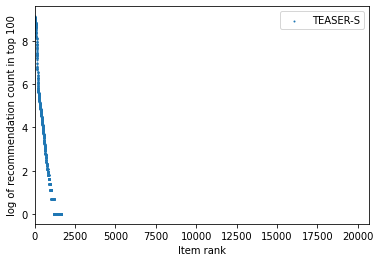

In [13]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)